# Concept Drift on MNIST

~ [Paper](http://proceedings.mlr.press/v32/harel14.pdf)

In [1]:
from cd_utils import *

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_mldata

# Load data

In [2]:
mnist = fetch_mldata('MNIST original')

In [3]:
# get Stream data
n, = mnist.target.shape
X, _, y, _ = train_test_split(mnist.data, mnist.target, test_size=1/7, 
                              random_state=42, shuffle=True)
del mnist
print("Stream of {} samples.".format(X.shape[0]))

Stream of 60000 samples.


In [4]:
whos | grep ndarray

Variable   Type       Data/Info
-------------------------------
X          ndarray    60000x784: 47040000 elems, type `uint8`, 47040000 bytes (44.86083984375 Mb)
y          ndarray    60000: 60000 elems, type `float64`, 480000 bytes (468.75 kb)


## Concept Drift
Transpose a set of pictures, the expected result is a Concept Drift at k = 1300.

In [5]:
X[1300:1400, :] = X[1300:1400, ::-1] 

In [6]:
stream_size = 100
Stream = DataStream(X[:3000,:], y[:3000], size=stream_size)

D, times = concept_drift_scheme(window_size=stream_size, 
                                permut=30, 
                                cd_size=0.04, 
                                significance_rate=0.5,
                                data_stream=Stream)

############# STREAM N° 1 #############
Well 0.967741935484
Took : 0.7947287559509277
############# STREAM N° 2 #############
Well 1.0
Took : 2.4979193210601807
############# STREAM N° 3 #############
Well 0.806451612903
Took : 4.959459543228149
############# STREAM N° 4 #############
Well 1.0
Took : 8.343574523925781
############# STREAM N° 5 #############
Well 0.806451612903
Took : 13.242745161056519
############# STREAM N° 6 #############
Well 1.0
Took : 18.317840099334717
############# STREAM N° 7 #############
Well 1.0
Took : 24.10678720474243
############# STREAM N° 8 #############
Well 1.0
Took : 30.980952262878418
############# STREAM N° 9 #############
Well 0.870967741935
Took : 38.95978403091431
############# STREAM N° 10 #############
Well 0.870967741935
Took : 47.948983907699585
############# STREAM N° 11 #############
Well 0.774193548387
Took : 57.717002630233765
############# STREAM N° 12 #############
Well 0.935483870968
Took : 68.05991578102112
############# STREAM N° 1

In [7]:
D

[1300]

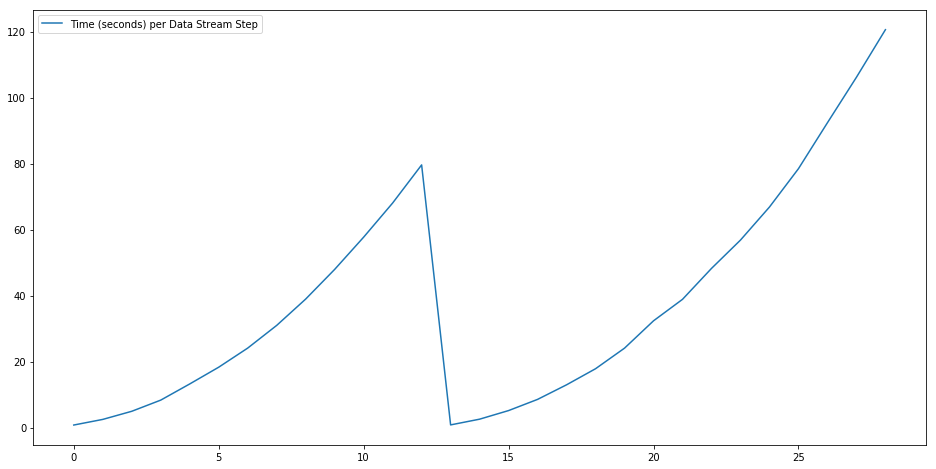

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plt.plot(times, label='Time (seconds) per Data Stream Step')
plt.legend();